In [14]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

import gym
import torch
import numpy as np
import seaborn as sns

from pathlib import Path
from matplotlib import pyplot as plt
from rbf_agent import RBFAgent
from common import helper as h

In [8]:
# load trained agent
env_name = 'CartPole-v0'
agent = RBFAgent(2)
agent.load(Path().cwd()/'results'/env_name/'model')

In [11]:
# create a gym environment
sns.set()
env = gym.make(env_name)

# extract action space dimension
action_space_dim = h.get_space_dim(env.action_space)

In [13]:
# extract observation space bounds
high_bounds = env.observation_space.high
low_bounds = env.observation_space.low

# set up ranges
resolution = 101
x_range = np.linspace(low_bounds[0], high_bounds[0], resolution)
th_range = np.linspace(low_bounds[2], high_bounds[2], resolution)
actions = np.zeros((resolution, resolution), dtype=np.int32)

In [15]:
# find best action for each state
for i, x in enumerate(x_range):
    for j, th in enumerate(th_range):
        # create the state vector from x, th
        state = np.array([x, 0, th, 0])
        
        # featurize state
        f_state = agent.featurize(state)

        # calculate q for each action/state
        q_values = [func.predict(f_state) for func in agent.q_functions]

        # find best action
        actions[i, j] = np.argmax(q_values)

In [18]:
# set plot ticks
num_ticks = 10
tick_skip = max(1, resolution // num_ticks)
tick_shift = 2*np.pi/resolution/2

x_tick_points = np.arange(resolution)[::tick_skip] 
x_tick_labels = x_range.round(2)[::tick_skip]

th_tick_points = np.arange(resolution)[::tick_skip] 
th_tick_labels = th_range.round(2)[::tick_skip]

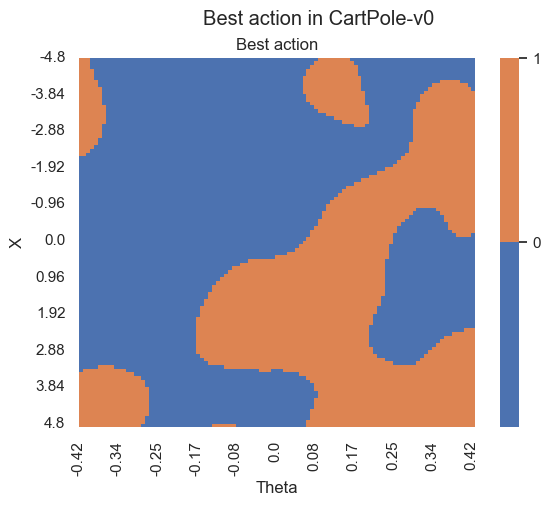

In [22]:
# create the policy plot
cmap = sns.color_palette("deep", action_space_dim)
sns.heatmap(actions, cmap=cmap, vmin=0, vmax=action_space_dim-1)

plt.xticks(th_tick_points, th_tick_labels)
plt.yticks(x_tick_points, x_tick_labels)

colorbar = plt.gca().collections[0].colorbar
ticks = np.array(range(action_space_dim))*((action_space_dim-1)/action_space_dim)+0.5
colorbar.set_ticks(ticks)
labels = list(map(str, range(action_space_dim)))
colorbar.set_ticklabels(labels)

plt.xlabel("Theta")
plt.ylabel("X")
plt.title("Best action")
plt.suptitle("Best action in %s" % env_name)
plt.show()